# [CM4] Random Forest Classifier

Importing all necessary libraries.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [33]:
df_train = pd.read_csv('cleaned_normalized_coviddata.csv')

In [34]:
df_train.head(5)

,Day,State ID,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,-1.178243,0.304476,-0.200641,0.143976,-0.483393,-0.475230,-1.301745,-0.128579,-0.217013,0.118745,-1.168255,True,False,False
1,2,2,3.607611,-3.031933,-0.448967,-0.290209,-0.569371,-1.797949,2.071154,-0.754174,-0.276752,1.614369,3.491260,True,True,False
2,2,3,-0.945708,-0.944926,0.389043,0.088511,-0.007491,0.075713,-1.268952,0.181561,-0.239163,0.508908,0.384916,True,True,True
3,2,4,-0.741458,0.025816,-0.482359,0.202178,-0.456457,-0.029941,-0.559153,-0.422031,-0.242214,0.573935,-0.546987,True,True,True
4,2,5,-0.552594,-1.365168,4.275448,-0.502417,4.022089,-0.791062,-0.177543,4.903416,-0.122735,-0.921689,0.384916,True,True,False


In [35]:
df_covid = df_train.iloc[:,:-3]
#Target 1 is Recovered
df_target1 = df_train.iloc[:,-1:]
#Target 2 is Deaths
df_target2 = df_train.iloc[:,-2:-1]
#Target 3 is Confirmed
df_target3 = df_train.iloc[:,-3:-2]

# Part1: Random Forest results using original features 

## 1. Random Forest Implementation on Target 1:Recovered

### number of trees: {5, 10, 50, 150, 200}
###  max depth: {3, 5, 10, None}

In [36]:
n_trees = [5,10,50,150,200]
max_depth = [3,5,10,None]

In [37]:
# Random Forest on target 1: Recovered
accuracies_recovered = []
for n_tree in n_trees:
    for max_d in max_depth:
        classifier_RandomForest_recovered = RandomForestClassifier(max_depth = max_d,n_estimators = n_tree, random_state=0)
        scores = cross_val_score(classifier_RandomForest_recovered, df_covid, np.ravel(df_target1), cv=10)
        accuracies_recovered.append(scores.mean())
        
# Heat Map for Recovered
heatmap_df_recovered = pd.DataFrame(np.array(accuracies_recovered).reshape(len(n_trees),len(max_depth)),columns=max_depth,index=n_trees)
heatmap_df_recovered

,3,5,10,NaN
5,0.855072,0.934783,0.936957,0.921014
10,0.861594,0.934783,0.936232,0.917391
50,0.880435,0.931884,0.932609,0.926812
150,0.876087,0.931884,0.934058,0.924638
200,0.874638,0.931884,0.932609,0.924638


Text(0.5, 24.0, 'Depth')

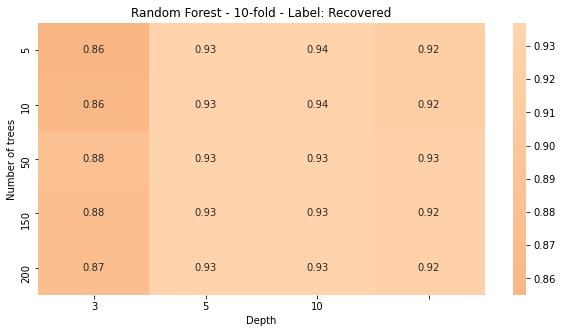

In [38]:
#Plotting the Heat Map for Recovered
plt.figure(figsize=(10,5))
plt.title("Random Forest - 10-fold - Label: Recovered")
sns.heatmap(heatmap_df_recovered,center=0,annot=True)
plt.ylabel('Number of trees')
plt.xlabel('Depth')

### From the heatmap plot above for target 1: Recovered, we can see that we attained best performance at a range of values the hyperparameters of Depth and Number of Trees. Among this, the best value would be Depth = 10 & Number of Trees = 5 considering the positive impact it would have on computation performance and inference speed. Higher these two parameters are, more is the performance overhead in terms of storage and computation.

## 2. Random Forest Implementation on Target 2: Deaths

In [39]:
# Random Forest on target 2: Deaths
accuracies_deaths = []
for n_tree in n_trees:
    for max_d in max_depth:
        classifier_RandomForest_deaths = RandomForestClassifier(max_depth = max_d,n_estimators = n_tree, random_state=0)
        scores = cross_val_score(classifier_RandomForest_deaths, df_covid, np.ravel(df_target2), cv=10)
        accuracies_deaths.append(scores.mean())
        
# Heat Map for Deaths
heatmap_df_deaths = pd.DataFrame(np.array(accuracies_deaths).reshape(len(n_trees),len(max_depth)),columns=max_depth,index=n_trees)
heatmap_df_deaths

,3,5,10,NaN
5,0.907246,0.902174,0.826087,0.837681
10,0.910870,0.907246,0.842754,0.836232
50,0.910870,0.898551,0.850000,0.840580
150,0.913768,0.875362,0.856522,0.848551
200,0.913768,0.869565,0.857971,0.847826


Text(0.5, 24.0, 'Depth')

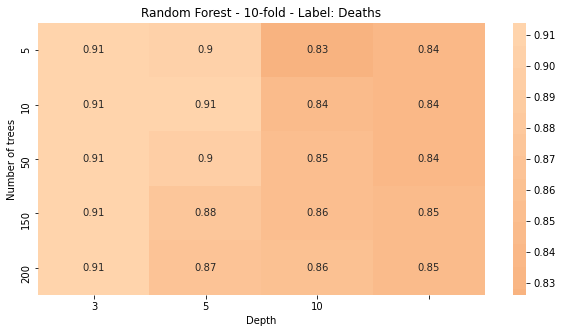

In [40]:
#Plotting the Heat Map for Deaths
plt.figure(figsize=(10,5))
plt.title("Random Forest - 10-fold - Label: Deaths")
sns.heatmap(heatmap_df_deaths,center=0,annot=True)
plt.ylabel('Number of trees')
plt.xlabel('Depth')

### From the heatmap plot above for target 2: Deaths, we can see that we attained best performance at a range of values the hyperparameters of Depth and Number of Trees. Among this, the best value would be Depth = 3 & Number of Trees either 150 or 200 considering the positive impact it would have on computation performance and inference speed. Higher these two parameters are, more is the performance overhead in terms of storage and computation.

## 3. Random Forest Implementation on Target 3: Confirmed

In [43]:
# Random Forest on target 3: Confirmed
accuracies_confirmed= []
for n_tree in n_trees:
    for max_d in max_depth:
        classifier_RandomForest_confirmed = RandomForestClassifier(max_depth = max_d,n_estimators = n_tree, random_state=0)
        scores = cross_val_score(classifier_RandomForest_confirmed, df_covid, np.ravel(df_target3), cv=10)
        accuracies_confirmed.append(scores.mean())
        
# Heat Map for Confirmed
heatmap_df_confirmed = pd.DataFrame(np.array(accuracies_confirmed).reshape(len(n_trees),len(max_depth)),columns=max_depth,index=n_trees)
heatmap_df_confirmed

,3,5,10,NaN
5,0.912319,0.917391,0.930435,0.927536
10,0.963043,0.958696,0.929710,0.937681
50,0.955797,0.943478,0.914493,0.918116
150,0.960870,0.915217,0.910145,0.907971
200,0.959420,0.918841,0.912319,0.908696


Text(0.5, 24.0, 'Depth')

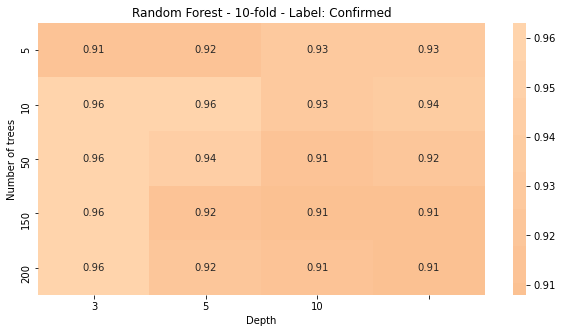

In [42]:
#Plotting the Heat Map for Confirmed
plt.figure(figsize=(10,5))
plt.title("Random Forest - 10-fold - Label: Confirmed")
sns.heatmap(heatmap_df_confirmed,center=0,annot=True)
plt.ylabel('Number of trees')
plt.xlabel('Depth')

### From the heatmap plot above for target 3: Confirmed, we can see that we attained best performance at a range of values the hyperparameters of Depth and Number of Trees. Among this, the best value would be Depth = 3 & Number of Trees = 10 considering the positive impact it would have on computation performance and inference speed. Higher these two parameters are, more is the performance overhead in terms of storage and computation.

# Part 2: Random Forest results using PCA features 

In [44]:
#extracting pca features from CM2
%store -r pca_features

In [45]:
pca_features.shape

(1380, 11)

## 1. Random Forest implementation on Target 1: Recovered

In [46]:
# Random Forest on target 1: Recovered using PCA
accuracies_recovered_pca = []
for n_tree in n_trees:
    for max_d in max_depth:
        classifier_RandomForest_recovered_pca = RandomForestClassifier(max_depth = max_d,n_estimators = n_tree, random_state=0)
        scores = cross_val_score(classifier_RandomForest_recovered_pca,pca_features[:,:3], np.ravel(df_target1), cv=10)
        accuracies_recovered_pca.append(scores.mean())

# Heat Map for Recovered
heatmap_df_recovered_pca = pd.DataFrame(np.array(accuracies_recovered_pca).reshape(len(n_trees),len(max_depth)),columns=max_depth,index=n_trees)
heatmap_df_recovered_pca

,3,5,10,NaN
5,0.806522,0.855797,0.918116,0.915217
10,0.766667,0.850725,0.925362,0.915942
50,0.770290,0.865217,0.928261,0.923188
150,0.778986,0.863768,0.928986,0.921014
200,0.776812,0.863043,0.928986,0.923188


Text(0.5, 24.0, 'Depth')

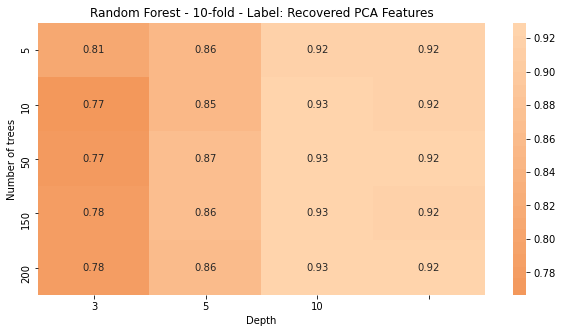

In [47]:
##Plotting the Heat Map for Recovered using PCA
plt.figure(figsize=(10,5))
plt.title("Random Forest - 10-fold - Label: Recovered PCA Features")
sns.heatmap(heatmap_df_recovered_pca,center=0,annot=True)
plt.ylabel('Number of trees')
plt.xlabel('Depth')

### From the heatmap plot above for target 1: Recovered using PCA, we can see that we attained best performance at a range of values the hyperparameters of Depth and Number of Trees. Among this, the best value would be Depth = 10 & Number of Trees = 150 or 200 considering the positive impact it would have on computation performance and inference speed. Higher these two parameters are, more is the performance overhead in terms of storage and computation.

## 2. Random Forest implementation on Target 2: Deaths

In [48]:
# Random Forest on target 2: Deaths using PCA
accuracies_deaths_pca = []
for n_tree in n_trees:
    for max_d in max_depth:
        classifier_RandomForest_deaths_pca = RandomForestClassifier(max_depth = max_d,n_estimators = n_tree, random_state=0)
        scores = cross_val_score(classifier_RandomForest_deaths_pca,pca_features[:,:3], np.ravel(df_target2), cv=10)
        accuracies_deaths_pca.append(scores.mean())

# Heat Map for Deaths
heatmap_df_deaths_pca = pd.DataFrame(np.array(accuracies_deaths_pca).reshape(len(n_trees),len(max_depth)),columns=max_depth,index=n_trees)
heatmap_df_deaths_pca

,3,5,10,NaN
5,0.910145,0.910870,0.905072,0.898551
10,0.910870,0.909420,0.903623,0.896377
50,0.910870,0.912319,0.907246,0.899275
150,0.910145,0.914493,0.904348,0.897826
200,0.911594,0.913768,0.902174,0.897101


Text(0.5, 24.0, 'Depth')

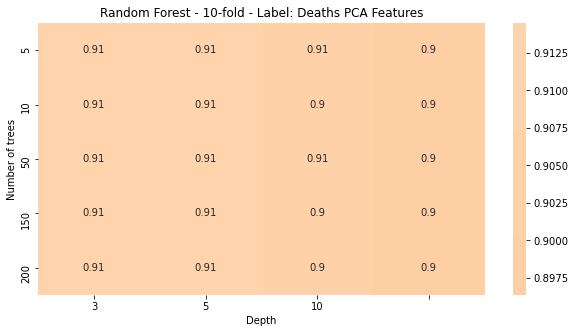

In [49]:
#Plotting the Heat Map for Deaths using PCA
plt.figure(figsize=(10,5))
plt.title("Random Forest - 10-fold - Label: Deaths PCA Features")
sns.heatmap(heatmap_df_deaths_pca,center=0,annot=True)
plt.ylabel('Number of trees')
plt.xlabel('Depth')

### From the heatmap plot above for target 2: Deaths using PCA, we can see that we attained best performance at a range of values the hyperparameters of Depth and Number of Trees. Among this, the best value would be Depth = 5 & Number of Trees = 50 considering the positive impact it would have on computation performance and inference speed. Higher these two parameters are, more is the performance overhead in terms of storage and computation.

## 3. Random Forest implementation on Target 3: Confirmed

In [50]:
# Random Forest on target 3: Confirmed using PCA
accuracies_confirmed_pca = []
for n_tree in n_trees:
    for max_d in max_depth:
        classifier_RandomForest_confirmed_pca = RandomForestClassifier(max_depth = max_d,n_estimators = n_tree, random_state=0)
        scores = cross_val_score(classifier_RandomForest_confirmed_pca,pca_features[:,:3], np.ravel(df_target3), cv=10)
        accuracies_confirmed_pca.append(scores.mean())

# Heat Map for Confirmed
heatmap_df_confirmed_pca = pd.DataFrame(np.array(accuracies_confirmed_pca).reshape(len(n_trees),len(max_depth)),columns=max_depth,index=n_trees)
heatmap_df_confirmed_pca

,3,5,10,NaN
5,0.961594,0.961594,0.957246,0.960870
10,0.961594,0.963043,0.960145,0.960145
50,0.963043,0.963768,0.963043,0.962319
150,0.963043,0.963768,0.962319,0.961594
200,0.963043,0.963768,0.963043,0.961594


Text(0.5, 24.0, 'Depth')

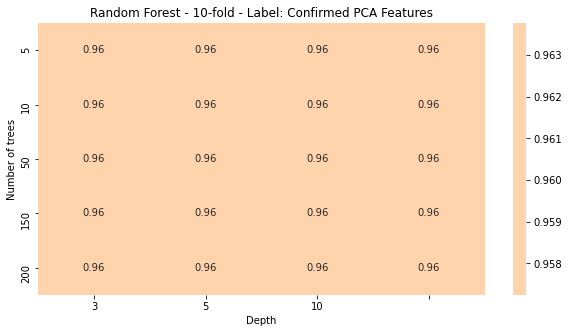

In [51]:
#Plotting the Heat Map for Confirmed using PCA
plt.figure(figsize=(10,5))
plt.title("Random Forest - 10-fold - Label: Confirmed PCA Features")
sns.heatmap(heatmap_df_confirmed_pca,center=0,annot=True)
plt.ylabel('Number of trees')
plt.xlabel('Depth')

### From the heatmap plot above for target 3: Confirmed using PCA, we can see that we attained best performance at a range of values the hyperparameters of Depth and Number of Trees. Among this, the best value would be Depth = 3 & Number of Trees = 50, 150, 200 so we will consider the value as 200 considering the positive impact it would have on computation performance and inference speed. Higher these two parameters are, more is the performance overhead in terms of storage and computation.